In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

# !curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [7]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


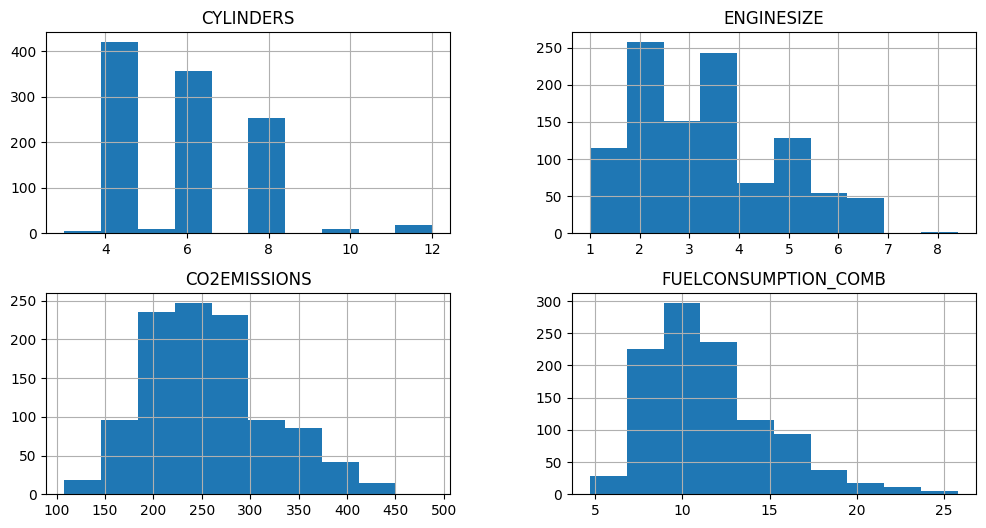

In [8]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

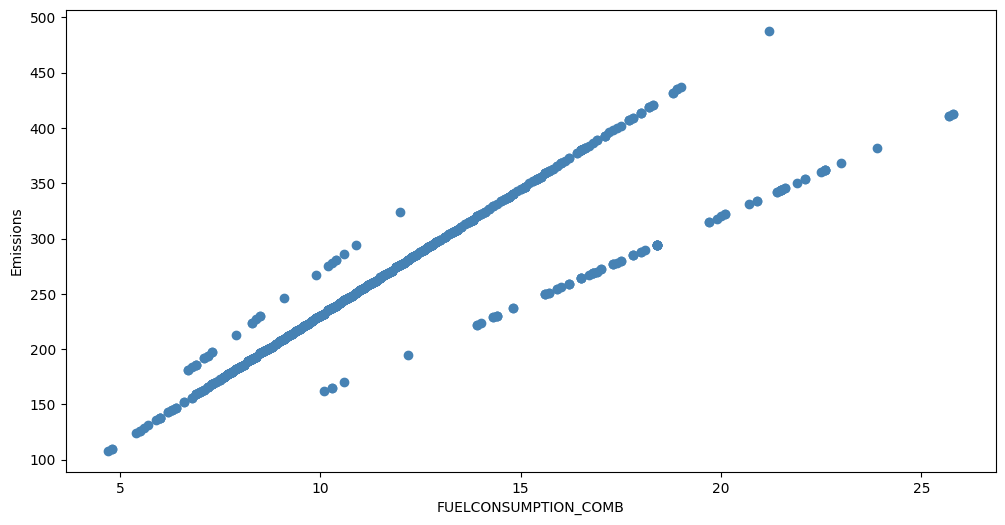

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

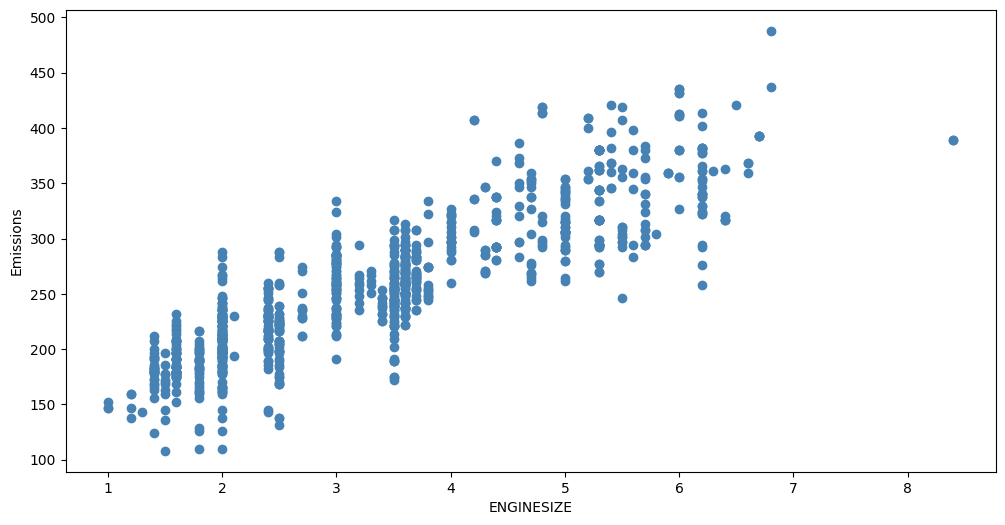

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

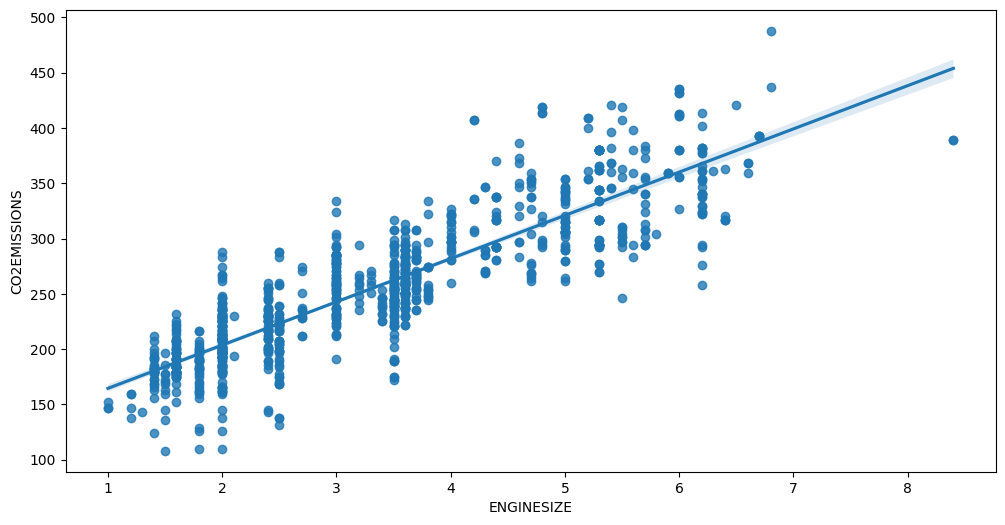

In [11]:
import seaborn as sns

sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

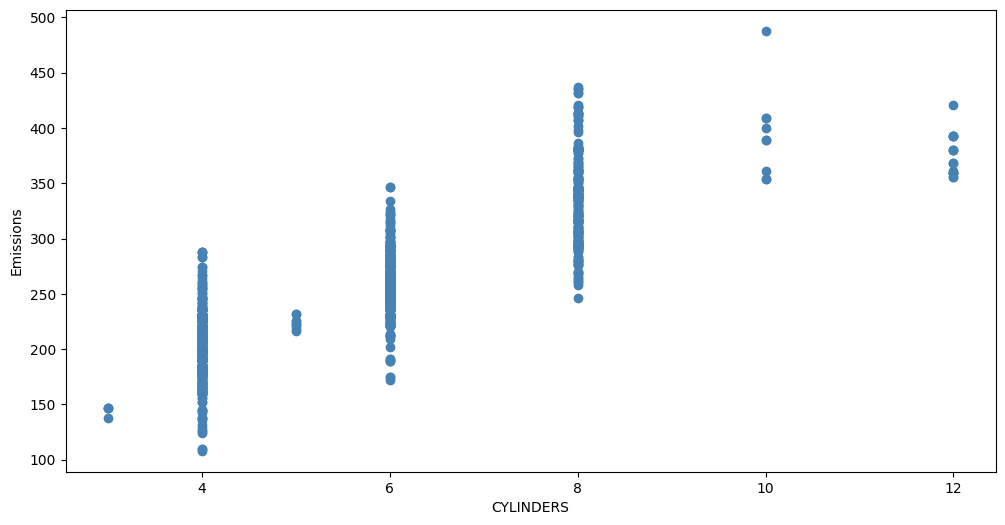

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions")
plt.show()

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

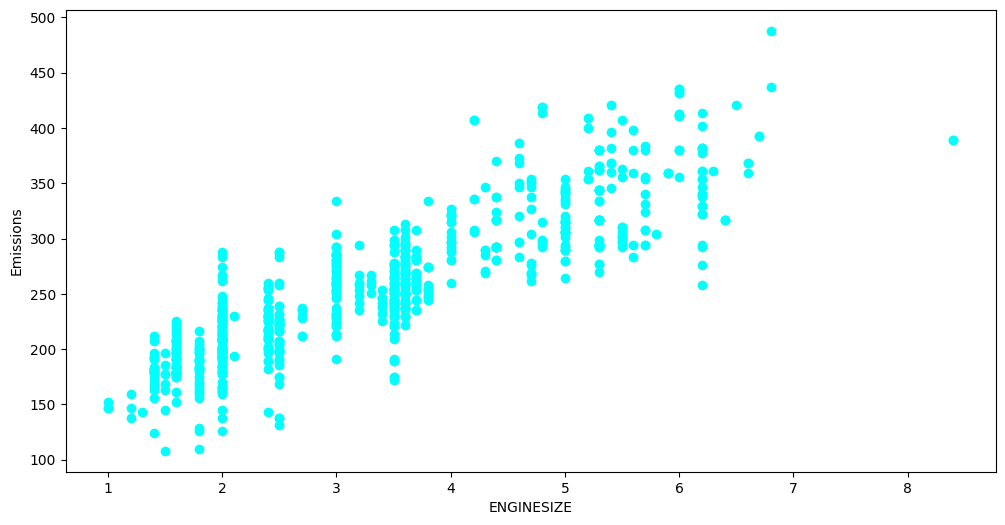

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

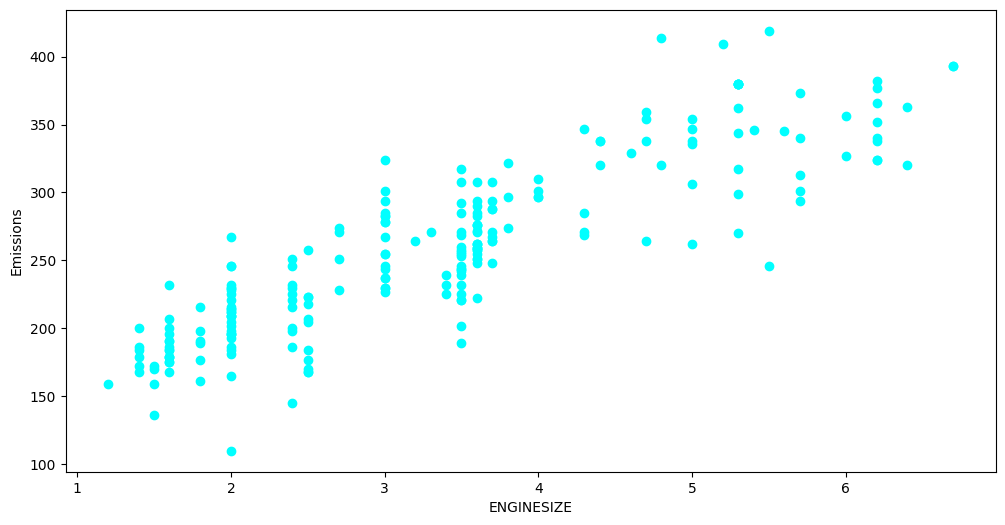

In [15]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [17]:
print(regr.coef_) # θ1
print(regr.intercept_) # θ0

[[39.04021202]]
[125.21858775]


# Simple regression formula
y ̂ = θ0 + θ1 x1
y = a + b * x

y = mx + b
y = regr.coef_ * x + intercept_

CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_

Text(0, 0.5, 'Emission')

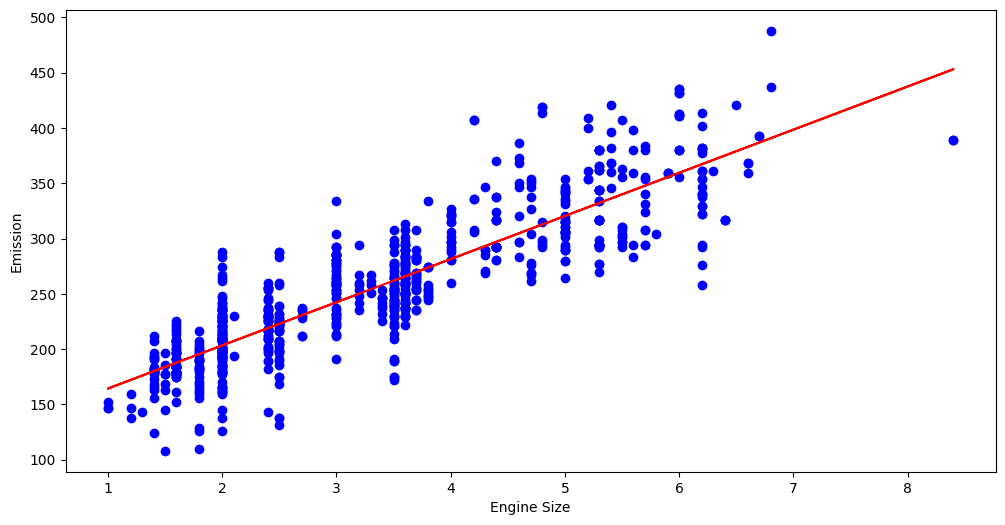

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

# Model evaluation metrics:
- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [20]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.45
Residual sum of squares (MSE): 945.33
R2-score: 0.76


In [21]:
# TODO
# Calculate values for FUELCONSUMPTION_COMB
# Use scikit-learn to implement Multiple Linear Regression
# Create a model, train it, test it and use the model

# first data-set
Mean absolute error: 23.56
Residual sum of squares (MSE): 974.39
R2-score: 0.76

# Multiple Linear Regression

In [22]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# formula
y = m0 ENGINESIZE + b0 + m1 CYLINDERS + b1 ... + mn xn + bn 
# TODO fix formula


CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_ ... +

CO2EMISSIONS = 125 + 7.5 * ENGINESIZE + 15 * CYLINDERS + ...

y = 150
196-150 = 46 "residual error"

Calculate MSE value for model accuracy

How to estimate multiple linear regression parameters?
- How to estimate θ?
    - Ordinary Least Squares:
        - Takes long time for large datasets (10K+ rows)

    - An optization algorithm
        - Gradient Descent

In [23]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [24]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


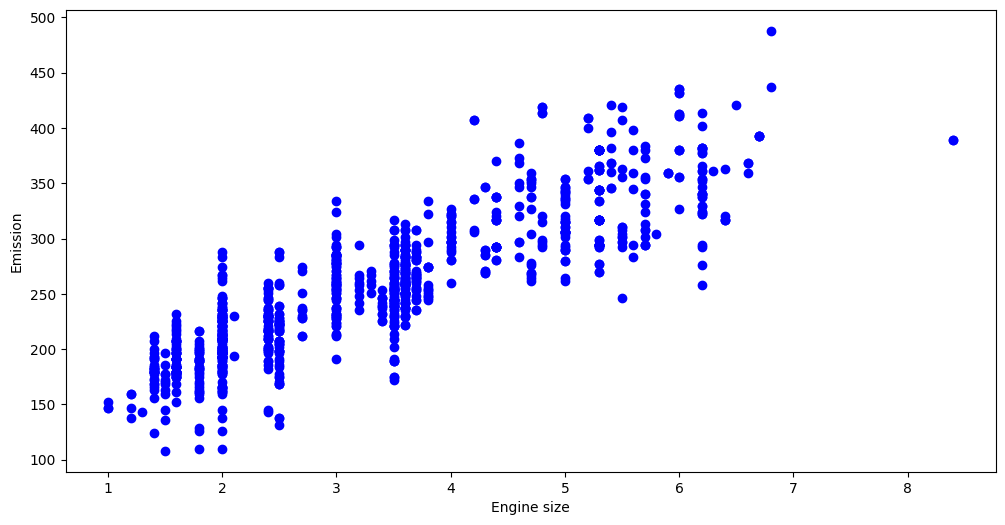

In [25]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [26]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

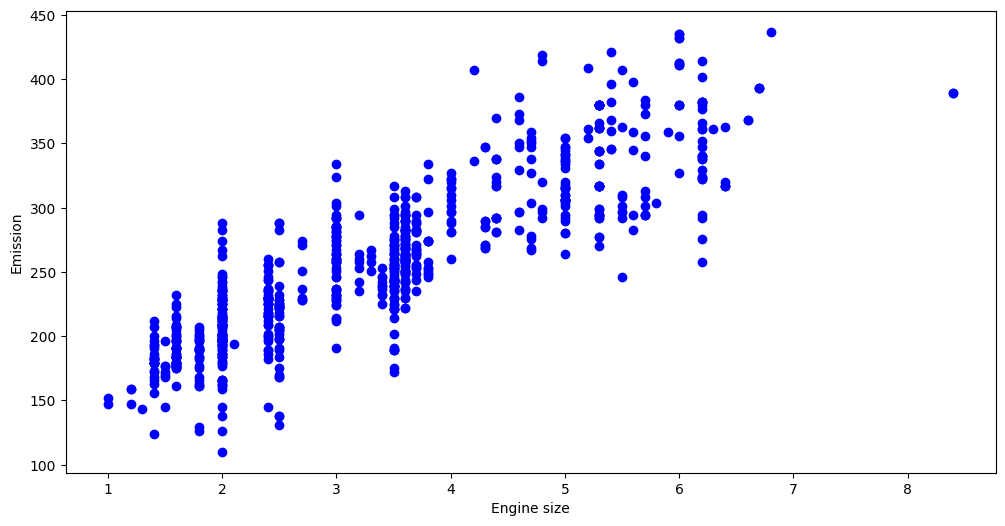

In [27]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x, y)

LinearRegression()

In [29]:
print('Coefficients:', regr.coef_)

Coefficients: [[12.0093617   6.91553434  9.28828332]]


In [30]:
# Prediction

y_hat = regr.predict(np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]))
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y)) # explained variance, best score is 1.0

Mean Squared Error (MSE) : 597.55
Variance score: 0.86


In [31]:
# TODO 
# How to use Mean Squared Error (MSE) in multiple regression

In [32]:
# Practice
# Use a multiple linear regression with the same data , use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB
# Does it result with better accuracy

In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'regr' is your previously trained linear regression model

# New predictors
new_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

# Fit the model with the new predictors
regr.fit(new_x, y)

# Predict using the new model
new_y_hat = regr.predict(new_x)

print("Mean Squared Error (MSE) with new predictors: %.2f"
      % np.mean((new_y_hat - y) ** 2))

print('Variance score with new predictors: %.2f' % regr.score(new_x, y))


Mean Squared Error (MSE) with new predictors: 581.55
Variance score with new predictors: 0.87
